In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
from mpl_toolkits.mplot3d import Axes3D

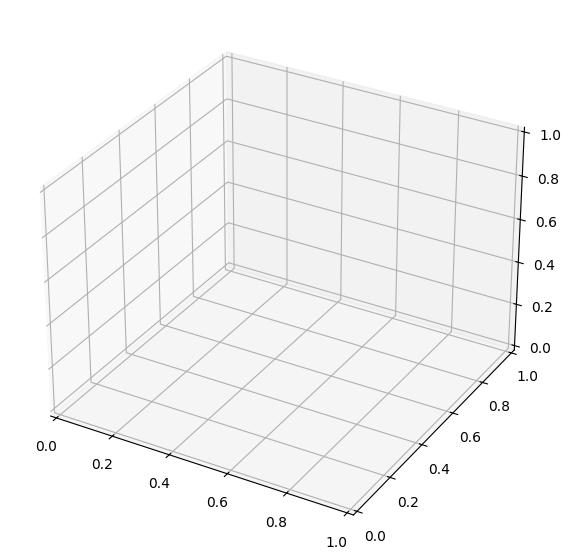

In [2]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')

In [3]:
ax.set_title('Divvy Bike Sharing 3D')
ax.set_xlabel("N")
ax.set_ylabel("M")
ax.set_zlabel("D")

Text(0.09909285648437682, 0.013275925435340903, 'D')

In [4]:
# return_nmd
# Get the node_list, edge_list and timestamp
def return_nm(df):
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    # started_atで昇順にソート
    df = df.sort_values(by='started_at')
    current_timestamp = df['started_at'].min()
    end_timestamp = df["started_at"].max()
    interval = timedelta(days=1)

    node_list = []
    edge_list = []
    timestamp = []
    distance_list = []

    while current_timestamp <= end_timestamp:
        timestamp.append(current_timestamp)
        next_timestamp = current_timestamp + interval
        df_tmp = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]

        # node_listにはユニークなstart_station_idを追加
        node_list.append(len(df_tmp['start_station_id'].unique()))

        # edge_listにはdf_tmpの行数を追加
        edge_list.append(len(df_tmp))

        # distance_listにはdf_tmpのdistanceを追加
        distance_list.append(df_tmp['distance'].mean())

        current_timestamp = next_timestamp

    # node_listとedge_listで0の値を削除
    node_list = np.array(node_list)
    edge_list = np.array(edge_list)
    distance_list = np.array(distance_list)
    timestamp = np.array(timestamp)
    node_list = node_list[node_list != 0]
    edge_list = edge_list[edge_list != 0]
    distance_list = distance_list[distance_list != 0]
    timestamp = timestamp[:len(node_list)]
    
    return node_list, edge_list, distance_list,timestamp

In [5]:
df = pd.read_csv("./data/wholetime.csv")
node_list, edge_list, distance_list,timestamp = return_nm(df)

/var/folders/pm/4cgtm7w90fbgczj718s4vvk40000gn/T/ipykernel_1525/19482750.py:1: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/wholetime.csv")


In [6]:
ax.plot(node_list, edge_list, distance_list, marker="o", linestyle='None', color='blue', alpha=0.5)
plt.show()

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (1278,)  and requested shape (1276,)